In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn. inspection import DecisionBoundaryDisplay

import pandas as pd

In [21]:
cancer=load_breast_cancer()
# print(cancer.DESCR)
X=cancer.data
y=cancer.target

In [22]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [23]:
print(cancer.target_names)

['malignant' 'benign']


In [24]:
X=cancer.data[:,:2]
y=cancer.target

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler =StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.svm import SVC

svc=SVC(kernel="linear",C=1)
svc.fit(X_train,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
accuracy=svc.score(X_test,y_test)
print("The accuracy of the model is: ",accuracy)

The accuracy of the model is:  0.9005847953216374


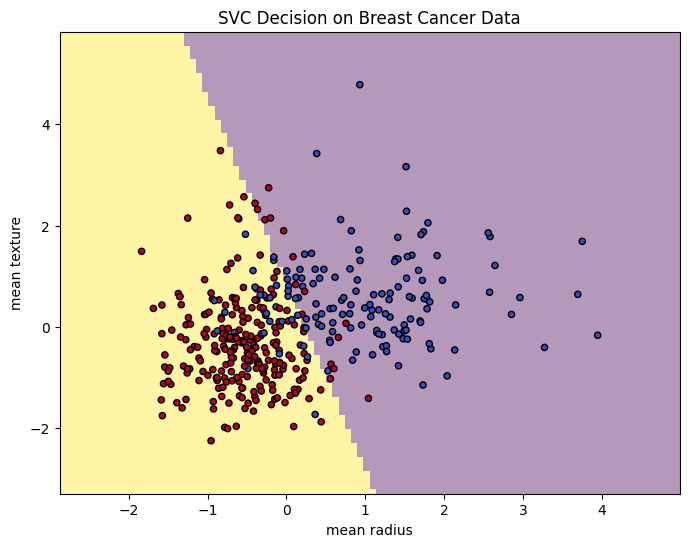

In [35]:
#Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

disp = DecisionBoundaryDisplay.from_estimator(
    svc,
    X_train,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.4,
    ax=ax,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)

# Plot the training data points
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors='k', cmap=plt.cm.coolwarm)



plt.title('SVC Decision on Breast Cancer Data')
plt.show()